**How Gradient Descent Algorithm works:**

![gd_theory](theory/8.png)

In [132]:
import numpy as np
import matplotlib.pyplot as plt

Generate random data

In [133]:
def gen_data(count=500, noise=10, slope=6, intercept=8):
    x = np.linspace(-10, 10, count)
    noise = np.random.randn(count) * noise
    y = slope * x + intercept + noise
    return x, y

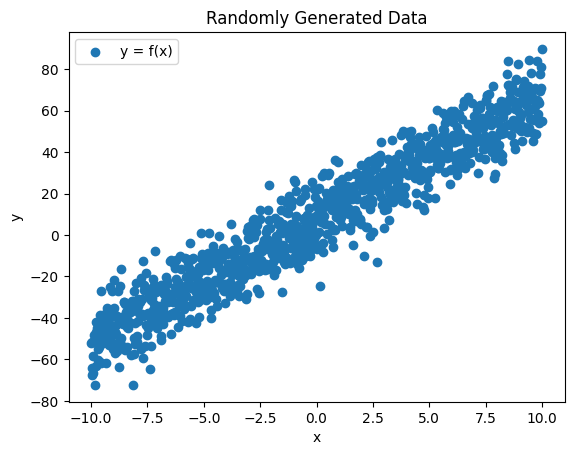

In [134]:
n = 1000
true_slope = 6
true_intercept = 8
x, y = gen_data(n, 10, true_slope, true_intercept)
plt.scatter(x, y, label="y = f(x)")
plt.title("Randomly Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Gradient Descent**

In [135]:
# Hypothesis --> H_w(x) = (w0 + w1 * x)
def h_w(x, w):
    return w[0] + w[1] * x


# Cost Function (SSE here)
def cost_function(x, y, w):
    return np.sum((h_w(x, w) - y)**2) / len(x)


def gradient_descent(x, y, w, alpha, steps):
    m = len(x)
    
    for i in range(steps):
        grad_w0 = np.sum(h_w(x,w) - y) / m
        grad_w1 = np.sum((h_w(x,w) - y) * x) / m
        w[0] -= alpha * grad_w0
        w[1] -= alpha * grad_w1

    return w

**Run Gradient Descent**

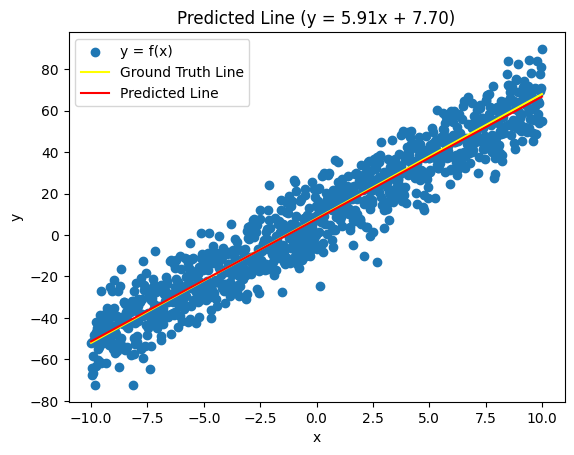

In [136]:
w_init = [0, 0]
w_final = gradient_descent(x, y, w_init, 0.05, 100)
y_hat = w_final[0] + w_final[1] * x
# Visualize the predicted line
plt.scatter(x, y, label="y = f(x)")
plt.plot(x, (true_slope*x + true_intercept), color='yellow', label="Ground Truth Line")
plt.plot(x, y_hat, color='red', label="Predicted Line")
plt.title(f"Predicted Line (y = {w_final[1]:.2f}x {"+" if (w_final[0] >= 0) else "-"} {np.abs(w_final[0]):.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()